Copyright **`(c)`** 2022 Giovanni Squillero `<squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

In [1]:
NUM_FRIENDS = 6
TANDEM_SEATS = 2

In [2]:
from gx_utils import *

In [3]:
from itertools import product, combinations
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout


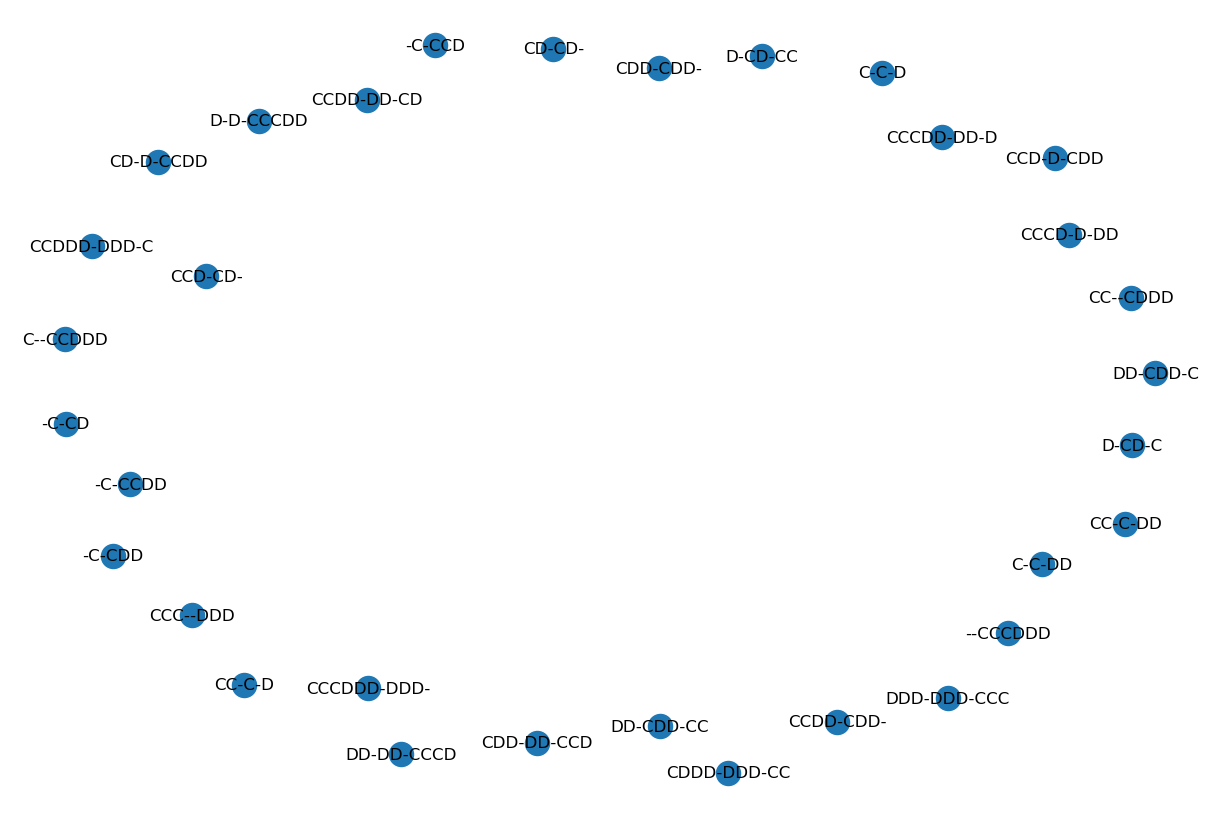

In [5]:
def node2sets(node):
    pizzeria, pub, tandem = node.split("-")
    return Multiset(pizzeria), Multiset(pub), Multiset(tandem)


def sets2node(pizzeria, pub, tandem):
    return "".join(pizzeria) + "-" + "".join(pub) + "-" + "".join(tandem)



#SOURCE -> N=6 CCCDDD--
#DESTINATION -> --CCCDDD
#POSSIBILE STATES DDDC-CC-  DDDC--CC DDDC-C-C DDDC-C-C DDCC--C DCC-

sspace = nx.Graph()


for c, d, b in product(range(NUM_FRIENDS // 2 + 1), range(NUM_FRIENDS // 2 + 1), range(TANDEM_SEATS// 2  + 1)):

    pizzeria =  "C" *( c - b) + "D" * (d -b)
    pub =  "C" * (NUM_FRIENDS // 2 - c -b ) + "D" * (NUM_FRIENDS // 2 - d -b) 
    tandem = "C" * (b ) + "D" * (d - b) 
    sspace.add_node(pizzeria + "-" + tandem + "-" + pub)


SOURCE = "C" * (NUM_FRIENDS // 2) + "D" * (NUM_FRIENDS // 2) + "-" + "-" 
DESTINATION = "-" + "-" + "C" * (NUM_FRIENDS // 2) + "D" * (NUM_FRIENDS // 2)

plt.figure(figsize=(12, 8))
nx.draw(sspace, with_labels=True)

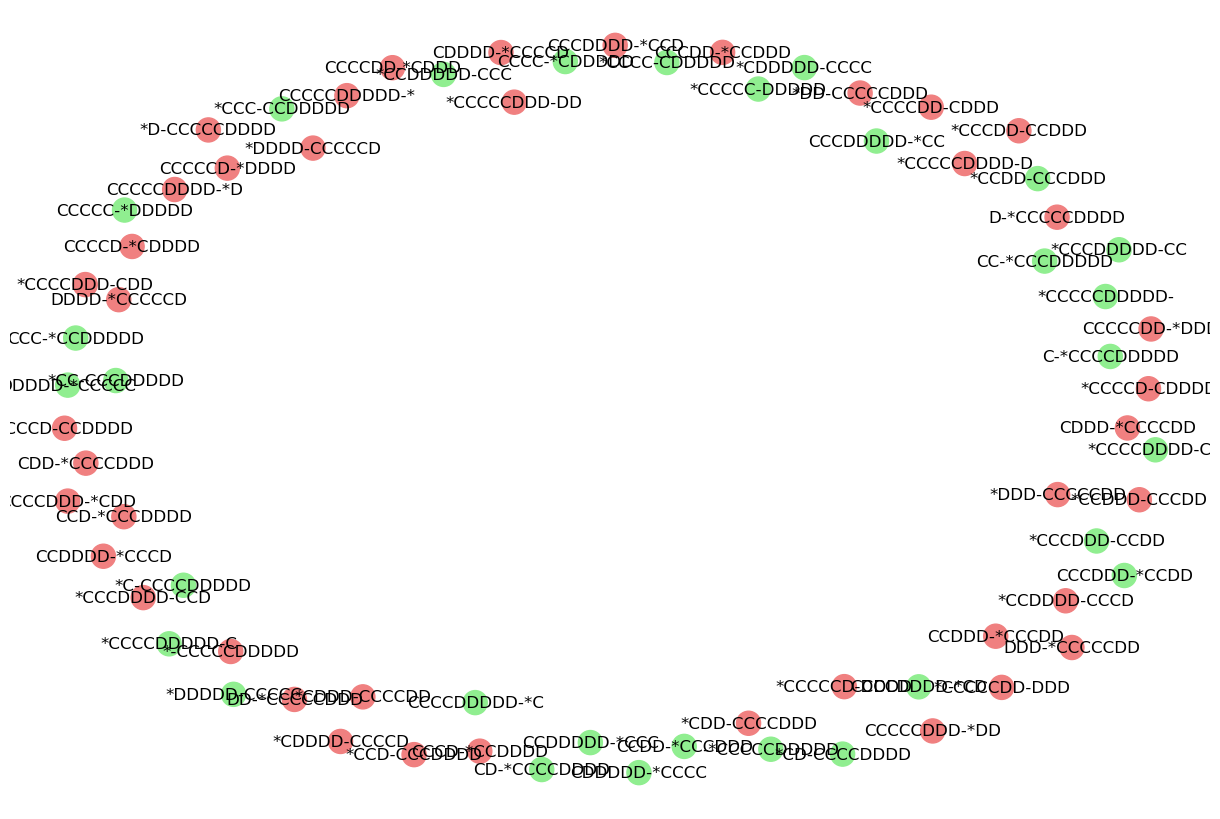

In [5]:
def valid_node(node):
    pizzeria, pub = node2sets(node)
    return valid_location(pizzeria) and valid_location(pub)


def valid_location(loc):
    if loc.count("*") == 1 and len(loc) == 1:
        return False
    if 0 < loc.count("D") < loc.count("C"):
        return False
    return True


plt.figure(figsize=(12, 8))
nx.draw(
    sspace,
    with_labels=True,
    node_color=["lightgreen" if valid_node(n) else "lightcoral" for n in sspace],
)

C:\Users\corri\AppData\Local\Temp\ipykernel_12396\2174749143.py:21: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  nx.draw(valid_sspace, pos=graphviz_layout(valid_sspace, prog="neato"), with_labels=True, node_color=node_color)


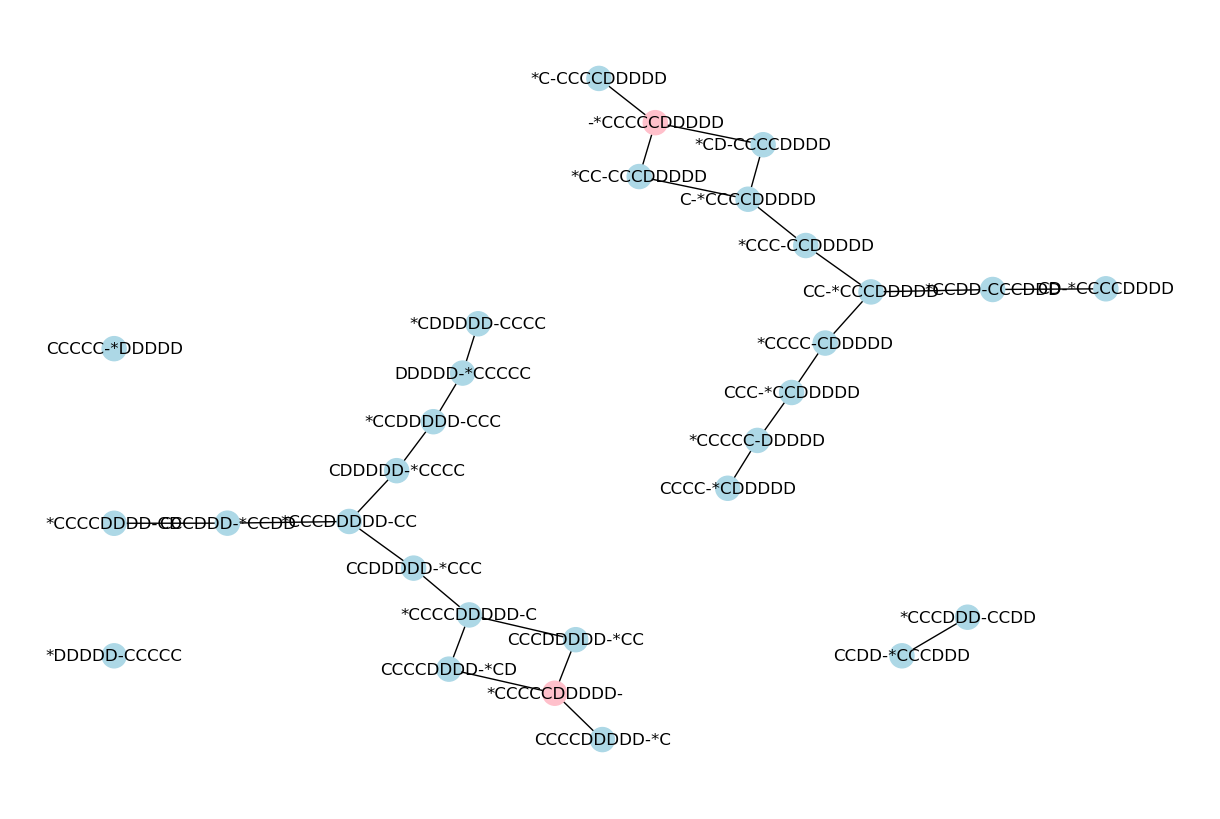

In [6]:
def bike(from_, to):
    possible = list()
    for b in ["*C", "*CC", "*D", "*DD", "*CD"]:
        bike = Multiset(b)
        if bike <= from_:
            possible.append(sets2node(from_ - bike, to + bike))
    return possible


valid_sspace = nx.Graph()

for node in sspace.nodes:
    if valid_node(node):
        valid_sspace.add_node(node)

for n1, n2 in [(a, b) for a in valid_sspace.nodes for b in bike(*node2sets(a)) if valid_node(b)]:
    valid_sspace.add_edge(n1, n2)

plt.figure(figsize=(12, 8))
node_color = ["pink" if n == SOURCE or n == DESTINATION else "lightblue" for n in valid_sspace]
nx.draw(valid_sspace, pos=graphviz_layout(valid_sspace, prog="neato"), with_labels=True, node_color=node_color)

In [7]:
nx.shortest_path(valid_sspace, SOURCE, DESTINATION)

NetworkXNoPath: No path between *CCCCCDDDDD- and -*CCCCCDDDDD.